In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\2076\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\2076\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
2,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
3,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
4,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.


In [4]:
df.isnull().sum()

category    25
rating      25
label       25
text_       25
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32749 entries, 0 to 32748
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  32724 non-null  object 
 1   rating    32724 non-null  float64
 2   label     32724 non-null  object 
 3   text_     32724 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1023.5+ KB


In [6]:
df.describe()

,rating
count,32724.000000
mean,4.263537
std,1.133743
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['rating'].value_counts()

5.0    19867
4.0     6543
3.0     3068
1.0     1683
2.0     1563
Name: rating, dtype: int64

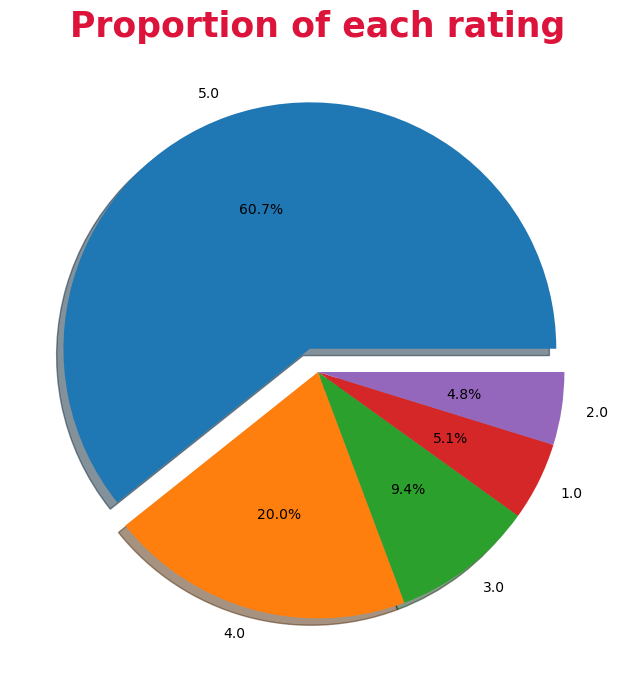

In [8]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [9]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [10]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [11]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1              pillow saved back love look feel pillow
2          Missing information use great product price
3                 nice set Good quality set two months
4                             WANTED DIFFERENT FLAVORS
Name: text_, dtype: object

In [12]:
df.shape

(32749, 4)

In [13]:
#df['text_'] = df['text_'].apply(clean_text)

In [14]:
df['text_'] = df['text_'].astype(str)

In [15]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])


In [16]:
preprocess(df['text_'][4])

'I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT'

In [17]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [19]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [20]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [21]:
df['text_'][30001:32750] = df['text_'][30001:32750].apply(preprocess)

In [22]:
df['text_'] = df['text_'].str.lower()

In [23]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [24]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [25]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1        thi pillow save back i love look feel pillow
2               miss inform use great product price i
3         veri nice set good qualiti we set two month
4               i want differ flavor but they are not
Name: text_, dtype: object

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [27]:
df.to_csv('Preprocessed dataset_s.csv')

In [28]:
df = pd.read_csv('Preprocessed dataset_s.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
2,2,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
3,3,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month
4,4,Home_and_Kitchen_5,3.0,CG,i want differ flavor but they are not


In [29]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [30]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
2,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
3,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month
4,Home_and_Kitchen_5,3.0,CG,i want differ flavor but they are not


In [31]:
df.dropna(inplace=True)

In [32]:
df['length'] = df['text_'].apply(len)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32723 entries, 0 to 32748
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  32723 non-null  object 
 1   rating    32723 non-null  float64
 2   label     32723 non-null  object 
 3   text_     32723 non-null  object 
 4   length    32723 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


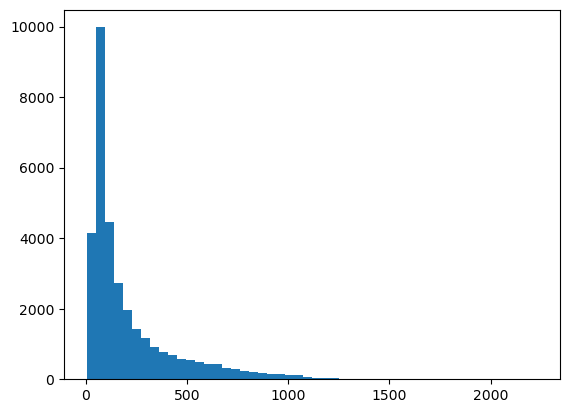

In [34]:
plt.hist(df['length'],bins=50)
plt.show()

In [35]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     16354.0  4.266418  1.129650  1.0  4.0  5.0  5.0  5.0  16354.0   
OR     16369.0  4.260676  1.137877  1.0  4.0  5.0  5.0  5.0  16369.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     177.918369  180.499347  13.0  56.0   96.0  226.0  1300.0  
OR     243.611888  262.550314   4.0  72.0  129.0  308.0  2232.0

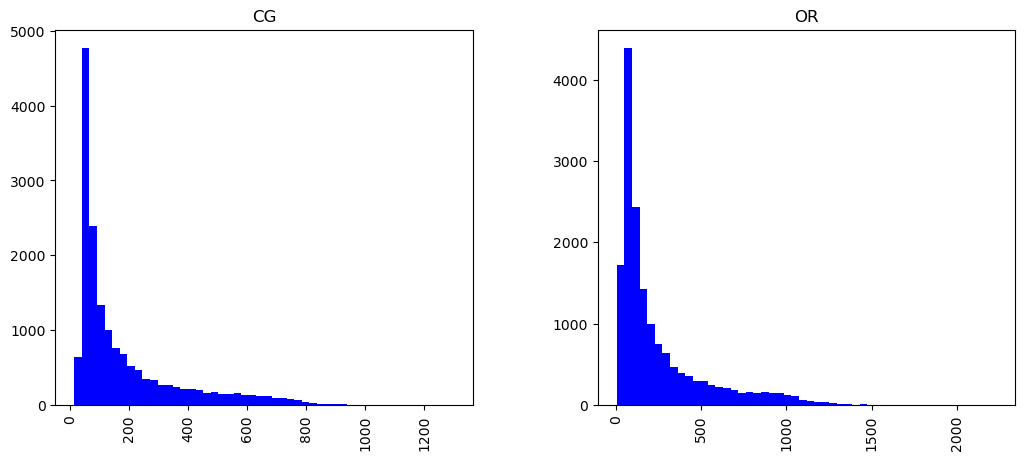

In [36]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [37]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [38]:
df.length.describe()

count    32723.000000
mean       210.780185
std        227.688525
min          4.000000
25%         62.000000
50%        112.000000
75%        266.000000
max       2232.000000
Name: length, dtype: float64

In [39]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001CAE205E480>)

In [41]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 31611


In [42]:
review4 = df['text_'][3]
review4

'veri nice set good qualiti we set two month'

In [43]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 12203)	1
  (0, 18405)	1
  (0, 19157)	1
  (0, 22375)	1
  (0, 24750)	2
  (0, 28902)	1
  (0, 29758)	1
(1, 31611)


# There are 6 unique words in the 4th review.

In [44]:
print(bow_transformer.get_feature_names_out()[15841])
print(bow_transformer.get_feature_names_out()[23848])


kri
russian


In [45]:
bow_reviews = bow_transformer.transform(df['text_'])

In [46]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (32723, 31611)
Amount of non zero values in the bag of words model: 831846


In [47]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.08


In [48]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 12203)	1
  (0, 18405)	1
  (0, 19157)	1
  (0, 22375)	1
  (0, 24750)	2
  (0, 28902)	1
  (0, 29758)	1


In [49]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.702716852073644
2.614615699396727


In [50]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (32723, 31611)
No. of Dimensions: 2


# Creating training and testing data

In [51]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [52]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

# Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [53]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CAE205E480>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [54]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'CG', 'OR', ..., 'CG', 'CG', 'OR'], dtype='<U2')

In [55]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.89      0.85      5707
          OR       0.88      0.79      0.83      5747

    accuracy                           0.84     11454
   macro avg       0.84      0.84      0.84     11454
weighted avg       0.84      0.84      0.84     11454

Confusion Matrix: [[5078  629]
 [1216 4531]]
Accuracy Score: 0.8389209009952855


In [56]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 83.89%


In [57]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [58]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CAE205E480>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [59]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'CG', 'OR', ..., 'CG', 'CG', 'CG'], dtype=object)

In [60]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.80      0.87      0.84      5707
          OR       0.86      0.79      0.82      5747

    accuracy                           0.83     11454
   macro avg       0.83      0.83      0.83     11454
weighted avg       0.83      0.83      0.83     11454

Confusion Matrix: [[4993  714]
 [1215 4532]]
Accuracy Score: 0.8315872184389733
Model Prediction Accuracy: 83.16%


In [61]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [62]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CAE205E480>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [63]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'CG', 'OR', ..., 'CG', 'CG', 'CG'], dtype=object)

In [64]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.72      0.74      0.73      5707
          OR       0.73      0.71      0.72      5747

    accuracy                           0.72     11454
   macro avg       0.72      0.72      0.72     11454
weighted avg       0.72      0.72      0.72     11454

Confusion Matrix: [[4203 1504]
 [1648 4099]]
Accuracy Score: 0.7248122926488563
Model Prediction Accuracy: 72.48%


In [65]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [66]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CAE205E480>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [67]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [68]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.97      0.70      5707
          OR       0.87      0.18      0.30      5747

    accuracy                           0.58     11454
   macro avg       0.70      0.58      0.50     11454
weighted avg       0.71      0.58      0.50     11454

Confusion Matrix: [[5549  158]
 [4703 1044]]
Accuracy Score: 0.5756067749257902
Model Prediction Accuracy: 57.56%


In [69]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [70]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CAE205E480>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [71]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'CG', 'OR'], dtype=object)

In [72]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.86      0.87      5707
          OR       0.86      0.89      0.88      5747

    accuracy                           0.87     11454
   macro avg       0.87      0.87      0.87     11454
weighted avg       0.87      0.87      0.87     11454

Confusion Matrix: [[4880  827]
 [ 633 5114]]
Accuracy Score: 0.8725336127117165
Model Prediction Accuracy: 87.25%


In [73]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [74]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CAE205E480>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [75]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'CG', 'OR', ..., 'CG', 'CG', 'OR'], dtype=object)

In [76]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.86      0.84      0.85      5707
          OR       0.85      0.86      0.86      5747

    accuracy                           0.85     11454
   macro avg       0.85      0.85      0.85     11454
weighted avg       0.85      0.85      0.85     11454

Confusion Matrix: [[4808  899]
 [ 784 4963]]
Accuracy Score: 0.8530644316396019
Model Prediction Accuracy: 85.31%


# Conclusion

In [78]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 85.31%
K Nearest Neighbors Prediction Accuracy: 57.56%
Decision Tree Classifier Prediction Accuracy: 72.48%
Random Forests Classifier Prediction Accuracy: 83.16%
Support Vector Machines Prediction Accuracy: 87.25%
Multinomial Naive Bayes Prediction Accuracy: 83.89%


In [30]:
!pip install torch

                                              0.0/198.6 MB ? eta -:--:--
                                              0.0/198.6 MB 1.3 MB/s eta 0:02:36
                                              0.1/198.6 MB 1.2 MB/s eta 0:02:46
                                              0.2/198.6 MB 1.9 MB/s eta 0:01:46
                                              0.5/198.6 MB 2.9 MB/s eta 0:01:10
                                              0.9/198.6 MB 3.8 MB/s eta 0:00:53
                                              1.3/198.6 MB 4.9 MB/s eta 0:00:41
                                              1.7/198.6 MB 5.4 MB/s eta 0:00:37
                                              1.9/198.6 MB 5.5 MB/s eta 0:00:36
                                              2.3/198.6 MB 5.7 MB/s eta 0:00:35
                                              2.8/198.6 MB 6.2 MB/s eta 0:00:32
                                              3.1/198.6 MB 6.2 MB/s eta 0:00:32
                                              3

In [32]:
!pip install torchmetrics

                                              0.0/841.5 kB ? eta -:--:--
     -                                       30.7/841.5 kB 1.4 MB/s eta 0:00:01
     ----                                  92.2/841.5 kB 871.5 kB/s eta 0:00:01
     ------                                 153.6/841.5 kB 1.0 MB/s eta 0:00:01
     ----------                             235.5/841.5 kB 1.2 MB/s eta 0:00:01
     --------------                         317.4/841.5 kB 1.3 MB/s eta 0:00:01
     ------------------                     399.4/841.5 kB 1.4 MB/s eta 0:00:01
     ---------------------                  481.3/841.5 kB 1.4 MB/s eta 0:00:01
     -------------------------              563.2/841.5 kB 1.5 MB/s eta 0:00:01
     -----------------------------          655.4/841.5 kB 1.5 MB/s eta 0:00:01
     --------------------------------       716.8/841.5 kB 1.6 MB/s eta 0:00:01
     ------------------------------------   819.2/841.5 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 841

In [78]:
pip install transformers

In [120]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [121]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  


In [122]:
def tokenize_text(text):
    return tokenizer.encode_plus(text, add_special_tokens=True, max_length=128, padding='max_length', truncation=True, return_tensors='pt')

def predict_with_bert(text):
    inputs = tokenize_text(text)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    predicted_label = torch.argmax(probabilities, dim=1).item()
    return predicted_label

In [123]:
# Function to preprocess text
def preprocess(text):
    # Tokenize the text and filter out stopwords, digits, and punctuation
    return ' '.join([word for word in word_tokenize(text) 
                     if word.lower() not in stopwords.words('english') 
                     and not word.isdigit() 
                     and word not in string.punctuation])

In [125]:
from sklearn.metrics import accuracy_score

#Example evaluation
accuracy = accuracy_score(df['label'], df['predicted_label'])
print(f"BERT Model Accuracy: {accuracy}%")

BERT Model Accuracy: 93.95%
